<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring_2022_Module_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code Block 1: Loads Data

Code Block 2: Converts data into a nice format for R. 

Code Block 3: Computes a confidence interval using a formula.

Code Block 4: Bypasses bootstrapping a fake population and draws samples as if a fake population was bootstrapped. 

Code Block 5: Graphs the distribution from bootstrapping. 

Code Block 6: For when you know the proportion and need to build a sample off of that.



In [ ]:
### Code Block 1
mydata = readRDS(url("https://github.com/matsonah/ClarkeStatsSpring2022/blob/main/data/saint_paul_stops.rds?raw=true"))$citation_issued
mydata = subset(mydata, !is.na(mydata))
str(mydata)

 logi [1:675153] FALSE FALSE FALSE FALSE FALSE FALSE ...


In [ ]:
### Code Block 2

mydata = as.numeric(mydata)
str(mydata)

 num [1:675153] 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
### Code Block 3

data = mydata 
conf.level = 0.95

pi_hat= mean(data)   # assumes yes = 1 and no = 0
sample.size = length(data)

stdev=sd(data)
z.star = qnorm(conf.level)
margin.of.error = abs(z.star)*(stdev/sqrt(sample.size))

lower.bound = max(pi_hat - margin.of.error,0)
upper.bound = min(pi_hat + margin.of.error,1)

cat(sep="","At a confidence level of ", conf.level*100, "%, the actual proportion of the population is between ", lower.bound," and ", upper.bound, ".")

At a confidence level of 95%, the actual proportion of the population is between 0.137877 and 0.1392602.

Bypass the building of a fake population by drawing a sample with replacement. 

In [ ]:
### Code Block 4
# Warning: If your sample size is big, this will take a long time to compile. If you give up waiting, you can reduce your sample.
size = length(mydata) 
size = min(size,1000)     # Restricts to a smaller sample size. Comment out this line if you want to try allowing a larger sample size.

data = sample(mydata,size)
z_conf=0.95 


alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)

cat("Sample size:", size, "observational units.\n")

test <- 0
test_runs = 100000
for(i in 1:test_runs){
  test[i] = mean( sample(data,size,replace=TRUE))
  }


cat(sep="","Original sample statistic is a proportion equal to ", mean(data),".\n")

Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population paramater is between ", Boot_left, " and ", Boot_right, ".\n")


Sample size: 1000 observational units.
Original sample statistic is a proportion equal to 0.149.
With a confidence level of 95%, the actual population paramater is between 0.1270269 and 0.1709705.


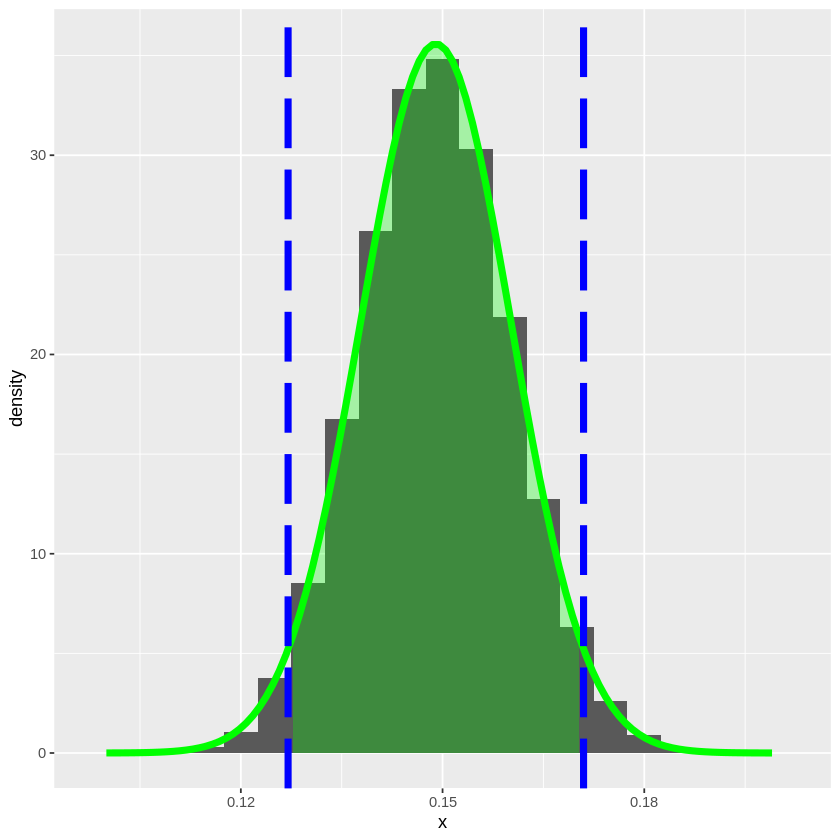

In [ ]:
### Code Block 5   
# Requires running code block 4 first.

library(ggplot2)

# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

ggplot( Boot, aes(x)) + 
#  geom_histogram(aes(y=..density../(2*pi)),binwidth=0.005) + 
  geom_histogram(aes(y=..density..),binwidth=0.005) +   
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 

Sample size: 1250 observational units.
Original sample statistic is a proportion equal to 0.8.
With a confidence level of 85%, the actual population paramater is between 0.7837453 and 0.8163166.


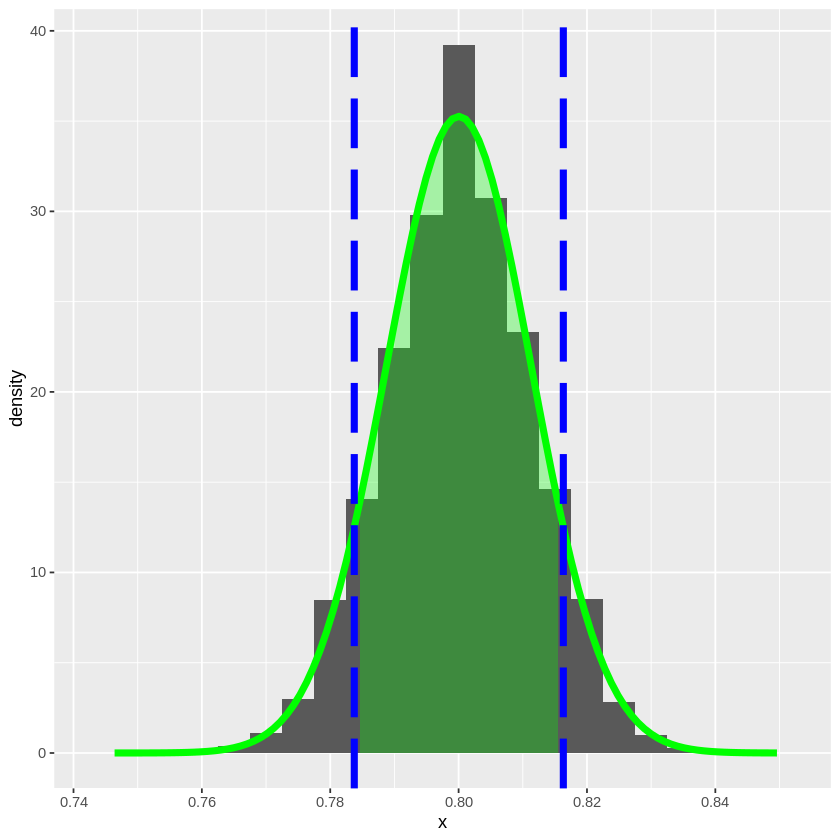

In [ ]:
### Code Block 6
# Can be run independently of all prior code blocks. 
# For proportions. 
library(ggplot2)

sample_count= 1000
sample_size = 1250
z_conf=0.85 



sample_complement = sample_size-sample_count 
data=rep(c(1,0),c(sample_count,sample_complement))   # repeats 1 sample_count times and 0 sample_complement times. 

alpha = 1-z_conf 
zsc=qnorm(z_conf + alpha/2)

size=length(data)
cat("Sample size:", size, "observational units.\n")

test <- 0
test_runs = 100000
for(i in 1:test_runs){
  test[i] = mean( sample(data,size,replace=TRUE))
  }


cat(sep="","Original sample statistic is a proportion equal to ", mean(data),".\n")

Boot = data.frame(x=test)
Boot_mean = mean(Boot$x)
Boot_sd = sd(Boot$x)
Boot_left=Boot_mean - zsc*Boot_sd
Boot_right=Boot_mean + zsc*Boot_sd 
Boots=c(Boot_left,Boot_right)

cat(sep="", "With a confidence level of ", z_conf*100, "%, the actual population paramater is between ", Boot_left, " and ", Boot_right, ".\n")



# Fancy function defined to allow for shading. 
dnorm_sd <- function(x,numsd){
  norm_sd <- dnorm(x,Boot_mean, Boot_sd)
  lb = Boot_mean - numsd*Boot_sd  #left bound 
  rb = Boot_mean + numsd*Boot_sd  #right bound 
  # Force NA values outside interval x in [leftbound, rightbound]:
  norm_sd[x <= lb | x >= rb] <- NA
  return(norm_sd)   #return is the result of the function dnorm_sd 
}

ggplot( Boot, aes(x)) + 
  geom_histogram(aes(y=..density..),binwidth=0.005) + 
  stat_function( fun=dnorm,    args=list(mean=Boot_mean, sd=Boot_sd), col="green", size=2) +
  stat_function( fun=dnorm_sd, args=list(numsd=zsc),  geom="area",  fill="green", alpha=0.3 ) + 
  geom_vline( xintercept=Boots,  linetype="longdash",  col="blue", size=2) 